# Sub question 5b

*Which four countries have the highest electric car and truck sales relative to the Human Development Index (HDI), and how have sales trends in these countries developed between 2010 and 2023?*

*Cars per Human Development Index:*
- Top four countries: China, USA, Germany, United Kingdom
- Year: 2022

*Trucks per Human Development Index:*
- Top four countries: China, Germany, Brasil, Canada
- Year: 2022

In [15]:
# Import helpfull packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Import car data

file_path = 'IEA-EV-dataEV salesHistoricalCars.csv'
df_cars = pd.read_csv(file_path)

df_cars_sales = df_cars[(df_cars['parameter'] == 'EV sales')]

df_cars_ev = df_cars_sales.drop(df_cars_sales[(df_cars_sales['powertrain'] == 'FCEV')       # Drop FCEV
                                | (df_cars_sales['region'] == 'World')                      # Drop World
                                | (df_cars_sales['region'] == 'EU27')                       # Drop EU27
                                | (df_cars_sales['region'] == 'Europe')                     # Drop Europe
                                | (df_cars_sales['region'] == 'Rest of the world')          # Drop Rest of the World
                                | (df_cars_sales['year'] >= 2023)].index)                   # Drop year 2023


In [17]:
# Import truck data

file_path = 'IEA-EV-dataEV salesHistoricalTrucks.csv'
df_trucks = pd.read_csv(file_path)

df_trucks_sales = df_trucks[(df_trucks['parameter'] == 'EV sales')]                                 # Only use the EV-sales

df_trucks_ev = df_trucks_sales.drop(df_trucks_sales[(df_trucks_sales['powertrain'] == 'FCEV')       # Drop FCEV    
                                | (df_trucks_sales['region'] == 'World')                            # Drop World
                                | (df_trucks_sales['region'] == 'EU27')                             # Drop EU27
                                | (df_trucks_sales['region'] == 'Europe')                           # Drop Europe
                                | (df_trucks_sales['region'] == 'Rest of the world')                # Drop Rest of the World
                                | (df_trucks_sales['year'] >= 2023)].index)                         # Drop year 2023      

In [18]:
# Reading the Human development data set and drop non-relevant datapoints

df_humandev = pd.read_csv('human-development-index.csv')                                                                    # Import csv file: Human development
df_humandev_years = df_humandev.drop(df_humandev[df_humandev['Year'] < 2010].index)                                         # Remove all years below 2010

df_new_humandev = df_humandev_years.copy()                                                                                  # Make a copy of the area_years dataframe
df_new_humandev['Entity'] = df_new_humandev['Entity'].replace({'United States': 'USA', 'Czechia': 'Czech Republic',
                                                               'South Korea': 'Korea', 'Turkey': 'Turkiye'})                # Replace names
car_countries= df_cars_ev['region'].unique()
df_humandev_y_cars = df_new_humandev[df_new_humandev['Entity'].isin(car_countries)]

truck_countries= df_trucks_ev['region'].unique()
df_humandev_y_trucks = df_new_humandev[df_new_humandev['Entity'].isin(truck_countries)]

Electric car/HDI sales

In [19]:
# Create dataframe EVs cars for the top for leading countries in 2022 according to human development: China, USA, Germany, United Kingdom

# China

df_cars_ev_china = df_cars_ev[df_cars_ev['region'] == 'China']                                                                               # Only use data if it is the right country            
df_cars_ev_china_grouped = df_cars_ev_china.groupby('year')                                                                                  # Group data by year
df_cars_ev_china_total = df_cars_ev_china_grouped['value'].sum().reset_index()                                                               # Use reset_index to restart index to start from zero 

china_humandev = df_humandev_y_cars[df_humandev_y_cars['Entity'] == 'China']                                                                 # Use the data of the right country
humandev_per_year_china = china_humandev.set_index('Year')['Human Development Index']                                                        # Obtain the information about the human development of the country

df_cars_china_humandev = df_cars_ev_china_total.copy()
df_cars_china_humandev['population'] = df_cars_china_humandev['year'].map(humandev_per_year_china)
df_cars_china_humandev['cars per human dev'] = df_cars_china_humandev['value'] / df_cars_china_humandev['population']                        # Average cars in the country per human development


In [20]:
# USA

df_cars_ev_usa = df_cars_ev[df_cars_ev['region'] == 'USA']                                                                                   # Only use data if it is the right country            
df_cars_ev_usa_grouped = df_cars_ev_usa.groupby('year')                                                                                      # Group data by year
df_cars_ev_usa_total = df_cars_ev_usa_grouped['value'].sum().reset_index()                                                                   # Use reset_index to restart index to start from zero 

usa_humandev = df_humandev_y_cars[df_humandev_y_cars['Entity'] == 'USA']                                                                     # Use the data of the right country
humandev_per_year_usa = usa_humandev.set_index('Year')['Human Development Index']                                                            # Obtain the information about the human development of the country

df_cars_usa_humandev = df_cars_ev_usa_total.copy()
df_cars_usa_humandev['population'] = df_cars_usa_humandev['year'].map(humandev_per_year_usa)
df_cars_usa_humandev['cars per human dev'] = df_cars_usa_humandev['value'] / df_cars_usa_humandev['population']                              # Average cars in the country per human development


In [21]:
# Germany

df_cars_ev_germany = df_cars_ev[df_cars_ev['region'] == 'Germany']                                                                           # Only use data if it is the right country            
df_cars_ev_germany_grouped = df_cars_ev_germany.groupby('year')                                                                              # Group data by year
df_cars_ev_germany_total = df_cars_ev_germany_grouped['value'].sum().reset_index()                                                           # Use reset_index to restart index to start from zero 

germany_humandev = df_humandev_y_cars[df_humandev_y_cars['Entity'] == 'Germany']                                                             # Use the data of the right country
humandev_per_year_germany = germany_humandev.set_index('Year')['Human Development Index']                                                    # Obtain the information about the human development of the country

df_cars_germany_humandev = df_cars_ev_germany_total.copy()
df_cars_germany_humandev['population'] = df_cars_germany_humandev['year'].map(humandev_per_year_germany)
df_cars_germany_humandev['cars per human dev'] = df_cars_germany_humandev['value'] / df_cars_germany_humandev['population']                  # Average cars in the country per human development


In [22]:
# United Kingdom

df_cars_ev_uk = df_cars_ev[df_cars_ev['region'] == 'United Kingdom']                                                                         # Only use data if it is the right country            
df_cars_ev_uk_grouped = df_cars_ev_uk.groupby('year')                                                                                        # Group data by year
df_cars_ev_uk_total = df_cars_ev_uk_grouped['value'].sum().reset_index()                                                                     # Use reset_index to restart index to start from zero 

uk_humandev = df_humandev_y_cars[df_humandev_y_cars['Entity'] == 'United Kingdom']                                                           # Use the data of the right country
humandev_per_year_uk = uk_humandev.set_index('Year')['Human Development Index']                                                              # Obtain the information about the human development of the country

df_cars_uk_humandev = df_cars_ev_uk_total.copy()
df_cars_uk_humandev['population'] = df_cars_uk_humandev['year'].map(humandev_per_year_uk)
df_cars_uk_humandev['cars per human dev'] = df_cars_uk_humandev['value'] / df_cars_uk_humandev['population']                                 # Average cars in the country per human development


Electric truck/HDI sales

In [23]:
# Create dataframe EVs trucks for the top for leading countries in 2022 according to human development: China, USA, Germany, United Kingdom

# China

df_trucks_ev_china = df_trucks_ev[df_trucks_ev['region'] == 'China']                                                                          # Only use data if it is the right country            
df_trucks_ev_china_grouped = df_trucks_ev_china.groupby('year')                                                                               # Group data by year
df_trucks_ev_china_total = df_trucks_ev_china_grouped['value'].sum().reset_index()                                                            # Use reset_index to restart index to start from zero 

china_humandev = df_humandev_y_cars[df_humandev_y_cars['Entity'] == 'China']                                                                  # Use the data of the right country
humandev_per_year_china = china_humandev.set_index('Year')['Human Development Index']                                                         # Obtain the information about the human development of the country

df_trucks_china_humandev = df_trucks_ev_china_total.copy()
df_trucks_china_humandev['population'] = df_trucks_china_humandev['year'].map(humandev_per_year_china)
df_trucks_china_humandev['trucks per human dev'] = df_trucks_china_humandev['value'] / df_trucks_china_humandev['population']                 # Average trucks in the country per human development

In [24]:
# Germany

df_trucks_ev_germany = df_trucks_ev[df_trucks_ev['region'] == 'Germany']                                                                      # Only use data if it is the right country            
df_trucks_ev_germany_grouped = df_trucks_ev_germany.groupby('year')                                                                           # Group data by year
df_trucks_ev_germany_total = df_trucks_ev_germany_grouped['value'].sum().reset_index()                                                        # Use reset_index to restart index to start from zero 

germany_humandev = df_humandev_y_cars[df_humandev_y_cars['Entity'] == 'Germany']                                                              # Use the data of the right country
humandev_per_year_germany = germany_humandev.set_index('Year')['Human Development Index']                                                     # Obtain the information about the human development of the country

df_trucks_germany_humandev = df_trucks_ev_germany_total.copy()
df_trucks_germany_humandev['population'] = df_trucks_germany_humandev['year'].map(humandev_per_year_germany)
df_trucks_germany_humandev['trucks per human dev'] = df_trucks_germany_humandev['value'] / df_trucks_germany_humandev['population']           # Average trucks in the country per human development


In [25]:
# Brasil

df_trucks_ev_brazil = df_trucks_ev[df_trucks_ev['region'] == 'Brazil']                                                                        # Only use data if it is the right country            
df_trucks_ev_brazil_grouped = df_trucks_ev_brazil.groupby('year')                                                                             # Group data by year
df_trucks_ev_brazil_total = df_trucks_ev_brazil_grouped['value'].sum().reset_index()                                                          # Use reset_index to restart index to start from zero 

brazil_humandev = df_humandev_y_cars[df_humandev_y_cars['Entity'] == 'Brazil']                                                                # Use the data of the right country
humandev_per_year_brazil = brazil_humandev.set_index('Year')['Human Development Index']                                                       # Obtain the information about the human development of the country

df_trucks_brazil_humandev = df_trucks_ev_brazil_total.copy()
df_trucks_brazil_humandev['population'] = df_trucks_brazil_humandev['year'].map(humandev_per_year_brazil)
df_trucks_brazil_humandev['trucks per human dev'] = df_trucks_brazil_humandev['value'] / df_trucks_brazil_humandev['population']              # Average trucks in the country per human development


In [26]:
# Canada

df_trucks_ev_canada = df_trucks_ev[df_trucks_ev['region'] == 'Canada']                                                                        # Only use data if it is the right country            
df_trucks_ev_canada_grouped = df_trucks_ev_canada.groupby('year')                                                                             # Group data by year
df_trucks_ev_canada_total = df_trucks_ev_canada_grouped['value'].sum().reset_index()                                                          # Use reset_index to restart index to start from zero 

canada_humandev = df_humandev_y_cars[df_humandev_y_cars['Entity'] == 'Canada']                                                                # Use the data of the right country
humandev_per_year_canada = canada_humandev.set_index('Year')['Human Development Index']                                                       # Obtain the information about the human development of the country

df_trucks_canada_humandev = df_trucks_ev_canada_total.copy()
df_trucks_canada_humandev['population'] = df_trucks_canada_humandev['year'].map(humandev_per_year_canada)
df_trucks_canada_humandev['trucks per human dev'] = df_trucks_canada_humandev['value'] / df_trucks_canada_humandev['population']              # Average trucks in the country per human development


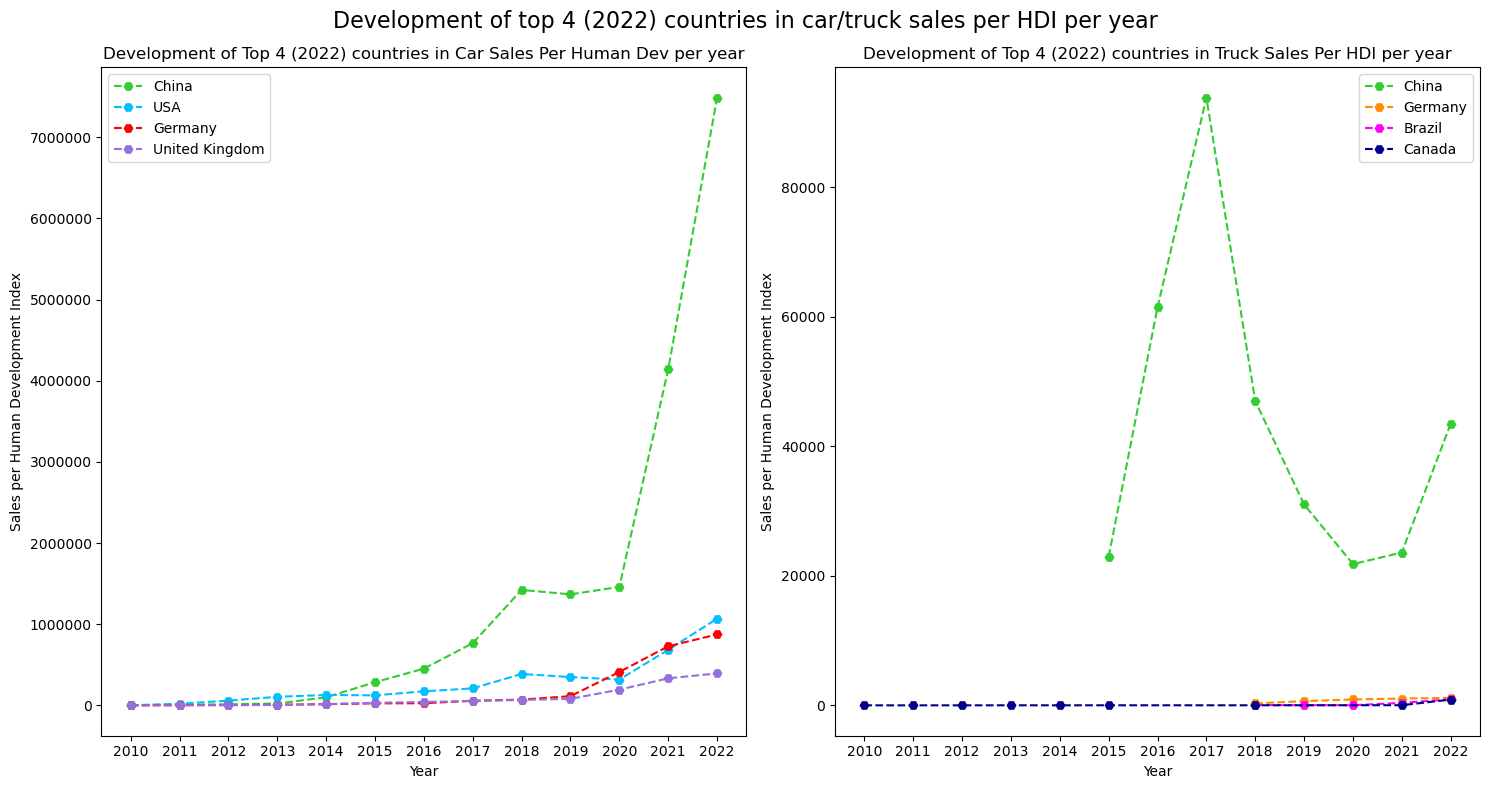

In [27]:
# Create figure with the data above
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Cars: China, USA, Germany, and United Kingdom
ax1.plot(df_cars_china_humandev['year'], df_cars_china_humandev['cars per human dev'], label='China', marker='H', linestyle="--", color='limegreen')               # Plotting China
ax1.plot(df_cars_usa_humandev['year'], df_cars_usa_humandev['cars per human dev'], label='USA', marker='H', linestyle="--", color='deepskyblue')                   # Plotting USA
ax1.plot(df_cars_germany_humandev['year'], df_cars_germany_humandev['cars per human dev'], label='Germany', marker='H', linestyle="--", color='red')               # Plotting Germany
ax1.plot(df_cars_uk_humandev['year'], df_cars_uk_humandev['cars per human dev'], label='United Kingdom', marker='H', linestyle="--", color='mediumpurple')         # Plotting United Kingdom
ax1.set_title('Development of Top 4 (2022) countries in Car Sales Per Human Dev per year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales per Human Development Index')
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_xticks(df_cars_ev['year'].unique())                                                                                                                        # Assuming years are the same for all countries
ax1.legend()

# Trucks: China, Germany, Brazil, and Canada
ax2.plot(df_trucks_china_humandev['year'], df_trucks_china_humandev['trucks per human dev'], label='China', marker='H', linestyle="--", color='limegreen')          # Plotting China
ax2.plot(df_trucks_germany_humandev['year'], df_trucks_germany_humandev['trucks per human dev'], label='Germany', marker='H', linestyle="--", color='darkorange')   # Plotting Germany
ax2.plot(df_trucks_brazil_humandev['year'], df_trucks_brazil_humandev['trucks per human dev'], label='Brazil', marker='H', linestyle="--", color='magenta')         # Plotting Brazil
ax2.plot(df_trucks_canada_humandev['year'], df_trucks_canada_humandev['trucks per human dev'], label='Canada', marker='H', linestyle="--", color='darkblue')        # Plotting Canada
ax2.set_title('Development of Top 4 (2022) countries in Truck Sales Per HDI per year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Sales per Human Development Index')
ax2.ticklabel_format(style='plain', axis='y')
ax2.set_xticks(df_trucks_ev['year'].unique())                                                                                                                       # Assuming years are the same for all countries
ax2.legend()

plt.suptitle('Development of top 4 (2022) countries in car/truck sales per HDI per year', fontsize=16)
plt.tight_layout()                                                                                                                                                  # Improve the layout                               
plt.show()
